In [1]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd

In [2]:
df = pd.read_csv('/Users/sparsons/PycharmProjects/DMProject/activities.csv')

In [3]:
df.head()

,Date,Name,Type,Moving Time,Distance (km),Elevation Gain (m),Avg Moving Speed (kph),Avg Pace (/km),Calories,Best 20min Speed (kph),...,HRSS / h,Best 20min HR (bpm),Cadence Avg Moving (rpm or spm),Avg Watts (w),Avg Watts / Kilograms (w/kg),Best 20min Power (w),Power Stress Score,Power Stress Score / h,Athlete Settings,Delete
0,2019-09-22T16:27:01-04:00,Último día de verano,Ride,01:58:06,62.5,589.0,31.7,01:53,1772,34,...,73,163,95,179,2.56,201,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
1,2019-09-21T11:57:23-04:00,Dos loops,Ride,02:38:51,80.1,890.0,28.7,02:05,2432,36.7,...,77,173,89,174,2.49,225,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
2,2019-09-20T17:55:47-04:00,Con poco tiempo,Ride,01:07:52,35.2,314.0,30.9,01:56,1029,34.5,...,76,163,91,169,2.42,188,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
3,2019-09-19T23:45:00-04:00,Complimentary calisthenics,Workout,01:00:00,0.0,0.0,-,-,-,-,...,-,-,-,-,-,-,-,-,Weight 70kg.,NaN
4,2019-09-18T17:41:48-04:00,Afternoon Ride,Ride,01:26:05,45.6,447.0,31.4,01:54,1326,36,...,81,173,97,181,2.59,221,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN


In [4]:
df.describe()

,Distance (km),Elevation Gain (m),Delete
count,573.000000,573.000000,0.0
mean,35.888656,620.718325,NaN
std,29.855291,601.756726,NaN
min,0.000000,0.000000,NaN
25%,9.300000,189.400000,NaN
50%,32.900000,526.000000,NaN
75%,51.900000,884.600000,NaN
max,170.600000,3617.000000,NaN


In [5]:
df = df[['Avg HR (bpm)','Date','Type','Distance (km)','Avg Pace (/km)','Calories','HRSS','Elevation Gain (m)']]
df = df.rename(columns={"Avg HR (bpm)": "AvgHR"})
df.head()



,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
0,158,2019-09-22T16:27:01-04:00,Ride,62.5,01:53,1772,144,589.0
1,158,2019-09-21T11:57:23-04:00,Ride,80.1,02:05,2432,217,890.0
2,159,2019-09-20T17:55:47-04:00,Ride,35.2,01:56,1029,87,314.0
3,-,2019-09-19T23:45:00-04:00,Workout,0.0,-,-,-,0.0
4,161,2019-09-18T17:41:48-04:00,Ride,45.6,01:54,1326,119,447.0


In [6]:
from dateutil.parser import parse
df = df[df.AvgHR != '-']
df = df[df.Type == 'Ride']

df = df.reset_index(drop=True)

df["AvgHR"] = pd.to_numeric(df["AvgHR"])
df["Calories"] = pd.to_numeric(df["Calories"])
df["HRSS"] = pd.to_numeric(df["HRSS"])
df.head()
for i in range(df.shape[0]):
    #print('done')
    #print(df.loc[i,'Avg Pace (/km)'])
    (m, s) = str(df.loc[i,'Avg Pace (/km)']).split(':')
    df.loc[i,'Avg Pace (/km)']= (int(m) * 60) + int(s)
    dt = parse(df.loc[i,'Date'])
    df.loc[i,'Date'] = dt.date()
    df.loc[i,'Time'] = dt.time()

df['Avg Pace (/km)'] = pd.to_numeric(df['Avg Pace (/km)'])

df.describe()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,154.535593,53.271525,152.298305,1615.294915,155.122034,912.209831
std,12.103490,27.276345,42.645180,844.898853,82.494477,656.472151
min,84.000000,1.400000,86.000000,48.000000,3.000000,0.000000
25%,149.000000,33.250000,119.500000,1012.000000,99.500000,512.000000
50%,155.000000,50.400000,152.000000,1395.000000,134.000000,743.000000
75%,160.500000,61.150000,169.000000,1873.000000,189.500000,1131.850000
max,191.000000,170.600000,477.000000,5415.000000,471.000000,3617.000000


In [7]:
df.groupby(['Type']).mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
Type,,,,,,
Ride,154.535593,53.271525,152.298305,1615.294915,155.122034,912.209831


In [8]:
for j in range(df.shape[0]):
    if int(df.loc[j,'AvgHR']) > 154:
        #print(df.loc[j,'AvgHR'])
        df.loc[j,'AvgHR_bin'] = 1
    else: 
        df.loc[j,'AvgHR_bin'] = 0

In [9]:
df

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
0,158,2019-09-22,Ride,62.5,113,1772,144,589.0,16:27:01,1.0
1,158,2019-09-21,Ride,80.1,125,2432,217,890.0,11:57:23,1.0
2,159,2019-09-20,Ride,35.2,116,1029,87,314.0,17:55:47,1.0
3,161,2019-09-18,Ride,45.6,114,1326,119,447.0,17:41:48,1.0
4,155,2019-09-17,Ride,41.1,120,1156,96,454.0,16:47:31,1.0
...,...,...,...,...,...,...,...,...,...,...
290,149,2017-08-18,Ride,70.9,146,1817,175,1202.7,10:09:39,0.0
291,148,2017-08-16,Ride,70.1,159,1827,191,1185.3,11:44:59,0.0
292,150,2017-08-14,Ride,53.7,163,1432,161,1015.8,13:41:10,0.0
293,131,2017-08-13,Ride,40.5,161,941,70,350.4,13:14:20,0.0


In [10]:
df.groupby('AvgHR_bin').mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
AvgHR_bin,,,,,,
0.0,145.881944,55.603472,168.256944,1659.166667,146.784722,1056.108333
1.0,162.788079,51.047682,137.079470,1573.456954,163.072848,774.982119


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


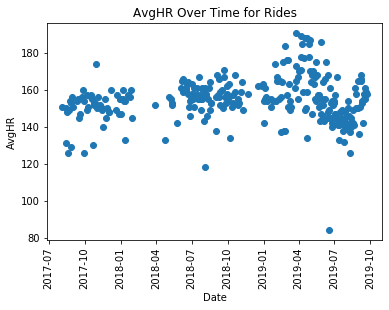

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot_date(df['Date'],df['AvgHR'])
plt.title('AvgHR Over Time for Rides')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('AvgHR')
plt.show()

In [12]:
count_no_sub = len(df[df['AvgHR_bin']==1])
count_sub = len(df[df['AvgHR_bin']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of High AvgHR is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Low AvgHR is", pct_of_sub*100)

percentage of High AvgHR is 51.186440677966104
percentage of Low AvgHR is 48.8135593220339


Text(0, 0.5, 'Frequency of Average HR')

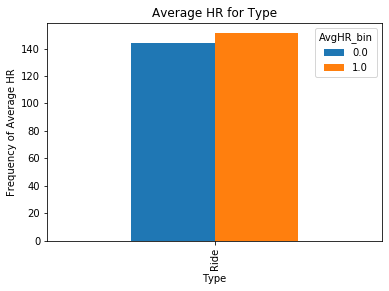

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.Type,df.AvgHR_bin).plot(kind='bar')
plt.title('Average HR for Type')
plt.xlabel('Type')
plt.ylabel('Frequency of Average HR')
#plt.savefig('purchase_avghr_type')

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [15]:

df_vars = ['Distance (km)', 'Avg Pace (/km)', 'HRSS', 'Elevation Gain (m)','AvgHR_bin']
df_final = df[df_vars]
df_final_vars=df_final.columns.values.tolist()
y=df_final.AvgHR_bin
X=[i for i in df_final_vars if i not in y]
X = df_final.loc[:, df_final.columns != 'AvgHR_bin']
y = df_final.loc[:, df_final.columns == 'AvgHR_bin']
X_train = X.iloc[10:]
y_train = y.iloc[10:]
X_test = X.iloc[:10]
y_test = y.iloc[:10]
#, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_test, y_test)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

   Distance (km)  Avg Pace (/km)  HRSS  Elevation Gain (m)
0           62.5             113   144               589.0
1           80.1             125   217               890.0
2           35.2             116    87               314.0
3           45.6             114   119               447.0
4           41.1             120    96               454.0
5           61.4             122   146               692.0
6           81.0             129   225              1096.0
7           51.4             128    90               576.0
8           55.4             114   116               502.0
9           47.2             116   106               447.0    AvgHR_bin
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        0.0
8        0.0
9        0.0
[ True  True  True  True]
[1 1 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
import statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304513
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.561     
Dependent Variable:  AvgHR_bin        AIC:              187.6628  
Date:                2019-11-15 10:17 BIC:              202.4107  
No. Observations:    295              Log-Likelihood:   -89.831   
Df Model:            3                LL-Null:          -204.40   
Df Residuals:        291              LLR p-value:      2.1349e-49
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Distance (km)      -0.1869   0.0274 -6.8247 0.0000 -0.2406 -0.1333
Avg Pace (/km)     -0.0131   0.0030 -4.4259 0.0000 -0

In [17]:
# Train model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
logreg = LogisticRegression()
actuals = pd.DataFrame(y_test)
actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
print('actuals: \n', actuals)
preds = np.zeros(X_test.shape[0])
print('X_test: \n', X_test)
for i in range(0,y_test.shape[0]):
    print('X train shape: ', X_train.shape[0])
    # print('X train: ', X_train.head())
    logreg.fit(X_train, y_train)
    # Predict test set
    print('X test: ', X_test.iloc[0])
    y_pred = logreg.predict(np.array(X_test.iloc[0]).reshape(1,-1))
    print('actual: ',y_test.loc[0, 'AvgHR_bin'], '\n pred: ',y_pred, '\n')
    preds[i] = y_pred
    #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    X_train = X_train.append(X_test.iloc[0])
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.append(y_test.iloc[0])
    y_train = y_train.reset_index(drop=True)
    X_test = X_test.drop(X_test.index[0])
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.drop(y_test.index[0])
    y_test = y_test.reset_index(drop=True)
    #print(X_test)
preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
print('actuals and preds: \n', preds_act_df.join(actuals))


actuals: 
    Actuals
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      0.0
9      0.0
X_test: 
    Distance (km)  Avg Pace (/km)  HRSS  Elevation Gain (m)
0           62.5             113   144               589.0
1           80.1             125   217               890.0
2           35.2             116    87               314.0
3           45.6             114   119               447.0
4           41.1             120    96               454.0
5           61.4             122   146               692.0
6           81.0             129   225              1096.0
7           51.4             128    90               576.0
8           55.4             114   116               502.0
9           47.2             116   106               447.0
X train shape:  285
X test:  Distance (km)          62.5
Avg Pace (/km)        113.0
HRSS                  144.0
Elevation Gain (m)    589.0
Name: 0, dtype: float64
actual:  1.0 
 pred:  [1.] 

X train shape: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

X train shape:  289
X test:  Distance (km)          41.1
Avg Pace (/km)        120.0
HRSS                   96.0
Elevation Gain (m)    454.0
Name: 0, dtype: float64
actual:  1.0 
 pred:  [0.] 

X train shape:  290
X test:  Distance (km)          61.4
Avg Pace (/km)        122.0
HRSS                  146.0
Elevation Gain (m)    692.0
Name: 0, dtype: float64
actual:  1.0 
 pred:  [0.] 



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X train shape:  291
X test:  Distance (km)           81.0
Avg Pace (/km)         129.0
HRSS                   225.0
Elevation Gain (m)    1096.0
Name: 0, dtype: float64
actual:  1.0 
 pred:  [1.] 

X train shape:  292
X test:  Distance (km)          51.4
Avg Pace (/km)        128.0
HRSS                   90.0
Elevation Gain (m)    576.0
Name: 0, dtype: float64
actual:  0.0 
 pred:  [0.] 

X train shape:  293
X test:  Distance (km)          55.4
Avg Pace (/km)        114.0
HRSS                  116.0
Elevation Gain (m)    502.0
Name: 0, dtype: float64
actual:  0.0 
 pred:  [0.] 

X train shape:  294
X test:  Distance (km)          47.2
Avg Pace (/km)        116.0
HRSS                  106.0
Elevation Gain (m)    447.0
Name: 0, dtype: float64
actual:  0.0 
 pred:  [0.] 

actuals and preds: 
    Predictions  Actuals
0          1.0      1.0
1          1.0      1.0
2          1.0      1.0
3          1.0      1.0
4          0.0      1.0
5          0.0      1.0
6          1.0      1.0
7      

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

In [18]:
# Predict test set
#y_pred = logreg.predict(np.array(X_test).reshape(1,-1))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(actuals, preds)
print(confusion_matrix)

[[3 0]
 [2 5]]


In [20]:
# Precision, recall, f1-score, support (# of test instances per class)
from sklearn.metrics import classification_report
print(classification_report(actuals, preds))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



In [21]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))
fpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-12503bbc37ed>, line 5)